In [192]:
import numpy as np
import json 
import seaborn as sns 
import matplotlib.pyplot as plt 
import pandas as pd 
import pickle

In [193]:
geo_result = './results/obj_spectrum_geo-predcls/log-mAP.txt'

In [252]:
geo_log_softmax_result = './results/obj_spectrum_soft_log_softmax_geo-predcls/log-mAP.txt'

In [253]:
freq_geo_result = './results/obj_spectrum_freq_geo-predcls/log-mAP.txt'

In [279]:
freq_geo_log_softmax_result = './results/obj_spectrum_soft_log_softmax_freq_geo-predcls/log-mAP.txt'

In [280]:
sum_weight_result = './results/obj_spectrum_gcn_sum0.7-predcls/log-mAP.txt'

In [288]:
sum_weight_log_softmax_result = './results/obj_spectrum_soft_log_softmax_iba25x25s1e-2_sum_softmax_v7-Predcls/log-mAP.txt'

### Load Logs

In [289]:
geo_preds = np.loadtxt(geo_result, dtype=str, delimiter = ") (")

In [290]:
geo_log_softmax_preds = np.loadtxt(geo_log_softmax_result, dtype=str, delimiter = ") (")

In [291]:
freq_geo_result_preds = np.loadtxt(freq_geo_result, dtype=str, delimiter = ") (")

In [292]:
freq_geo_log_softmax_result_preds = np.loadtxt(freq_geo_log_softmax_result, dtype=str, delimiter = ") (")

In [293]:
sum_weight_result_preds = np.loadtxt(sum_weight_result, dtype=str, delimiter = ") (")

In [294]:
sum_weight_log_softmax_preds = np.loadtxt(sum_weight_log_softmax_result, dtype=str, delimiter = ") (")

In [295]:
VG_dicts = []
freq_geo_mAP = []
geo_mAP = []
geo_log_softmax_mAP = []
freq_geo_log_softmax_mAP = []
sum_weight_mAP = []
sum_weightlog_softmax_mAP = []

In [296]:
for cls in geo_preds:
    cls = cls.replace("(", "")
    cls = cls.replace(")", "")
    
    #print(cls)
    cls_name = cls.split(':')[0]
    cls_mAP = float(cls.split(':')[1])
    
    geo_mAP.append(cls_mAP)
    VG_dicts.append(cls_name)

In [297]:
for cls in geo_log_softmax_preds:
    cls = cls.replace("(", "")
    cls = cls.replace(")", "")
    
    cls_mAP = float(cls.split(':')[1])
    
    geo_log_softmax_mAP.append(cls_mAP)

In [298]:
for cls in freq_geo_result_preds:
    cls = cls.replace("(", "")
    cls = cls.replace(")", "")
    
    cls_mAP = float(cls.split(':')[1])
    
    freq_geo_mAP.append(cls_mAP)

In [299]:
for cls in freq_geo_log_softmax_result_preds:
    cls = cls.replace("(", "")
    cls = cls.replace(")", "")
    
    cls_mAP = float(cls.split(':')[1])
    
    freq_geo_log_softmax_mAP.append(cls_mAP)

In [300]:
for cls in sum_weight_result_preds:
    cls = cls.replace("(", "")
    cls = cls.replace(")", "")
    
    cls_mAP = float(cls.split(':')[1])
    
    sum_weight_mAP.append(cls_mAP)

In [301]:
for cls in sum_weight_log_softmax_preds:
    cls = cls.replace("(", "")
    cls = cls.replace(")", "")
    
    cls_mAP = float(cls.split(':')[1])
    
    sum_weightlog_softmax_mAP.append(cls_mAP)

In [302]:
geo_mAP = np.array(geo_mAP)
geo_log_softmax_mAP = np.array(geo_log_softmax_mAP)
freq_geo_mAP = np.array(freq_geo_mAP)
freq_geo_log_softmax_mAP = np.array(freq_geo_log_softmax_mAP)

sum_weight_mAP = np.array(sum_weight_mAP)
sum_weightlog_softmax_mAP = np.array(sum_weightlog_softmax_mAP)

VG_dicts = np.array(VG_dicts)

In [303]:
cls_num_list = [3043905, 6712, 171, 208, 379, 504, 1829,
                1413, 10011, 644, 394, 1603, 397, 460,
                565, 4, 809, 163, 157, 663, 67144,
                10764, 21748, 3167, 752, 676, 364, 114,
                234, 15300, 31347, 109355, 333, 793, 151,
                601, 429, 71, 4260, 44, 5086, 2273,
                299, 3757, 551, 270, 1225, 352, 47326,
                4810,  11059]

cls_num_list = [6712, 171, 208, 379, 504, 1829,
                1413, 10011, 644, 394, 1603, 397, 460,
                565, 4, 809, 163, 157, 663, 67144,
                10764, 21748, 3167, 752, 676, 364, 114,
                234, 15300, 31347, 109355, 333, 793, 151,
                601, 429, 71, 4260, 44, 5086, 2273,
                299, 3757, 551, 270, 1225, 352, 47326,
                4810,  11059]

pred_prop = np.array(cls_num_list)
pred_idx = pred_prop.argsort()[::-1]

In [304]:
pred_idx

array([30, 19, 47, 29, 21, 28, 49, 20,  7,  0, 39, 48, 37, 42, 22, 40,  5,
       10,  6, 45, 15, 32, 23, 24, 18,  8, 34, 13, 43,  4, 12, 35, 11,  9,
        3, 25, 46, 31, 41, 44, 27,  2,  1, 16, 17, 33, 26, 36, 38, 14])

In [305]:
def createDataFrame(catIds, AP, model_name, VG_dicts): 
    cat = [VG_dicts[idx] for idx in catIds] 
    df = pd.DataFrame(list(zip(catIds, cat, AP)), columns=['catIds', 'category', 'mAP'], index=None)
    df['model'] = model_name
    return df

In [308]:
def drawApDiff(baseline_AP, target_AP, VG_dicts=VG_dicts, top_k=10): 
    Ap_diff = target_AP - baseline_AP 
    
    if False:
        sorted_args = np.flip(np.argsort(np.abs(Ap_diff[1:])), 0)[:top_k] + 1
        sorted_args = np.insert(sorted_args, 0, 0)
    else:
        sorted_args = pred_idx
    
    baseline_top_k = baseline_AP[sorted_args]
    target_top_k = target_AP[sorted_args]
    
    baseline_df = createDataFrame(sorted_args, baseline_top_k, 'sum_weight', VG_dicts)
    target_df = createDataFrame(sorted_args, target_top_k, 'sum_log_softmax', VG_dicts)
    
    df = baseline_df.append(target_df)
    fig, ax = plt.subplots(figsize=(top_k, 4), dpi=300)
    plt.setp( ax.xaxis.get_majorticklabels(), rotation=70 )
    sns.set()
    g = sns.barplot(data=df, x='category', y='mAP', hue='model', ax=ax)
    for p in g.patches:
        g.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', rotation=45, fontsize='x-small')
    return df, g

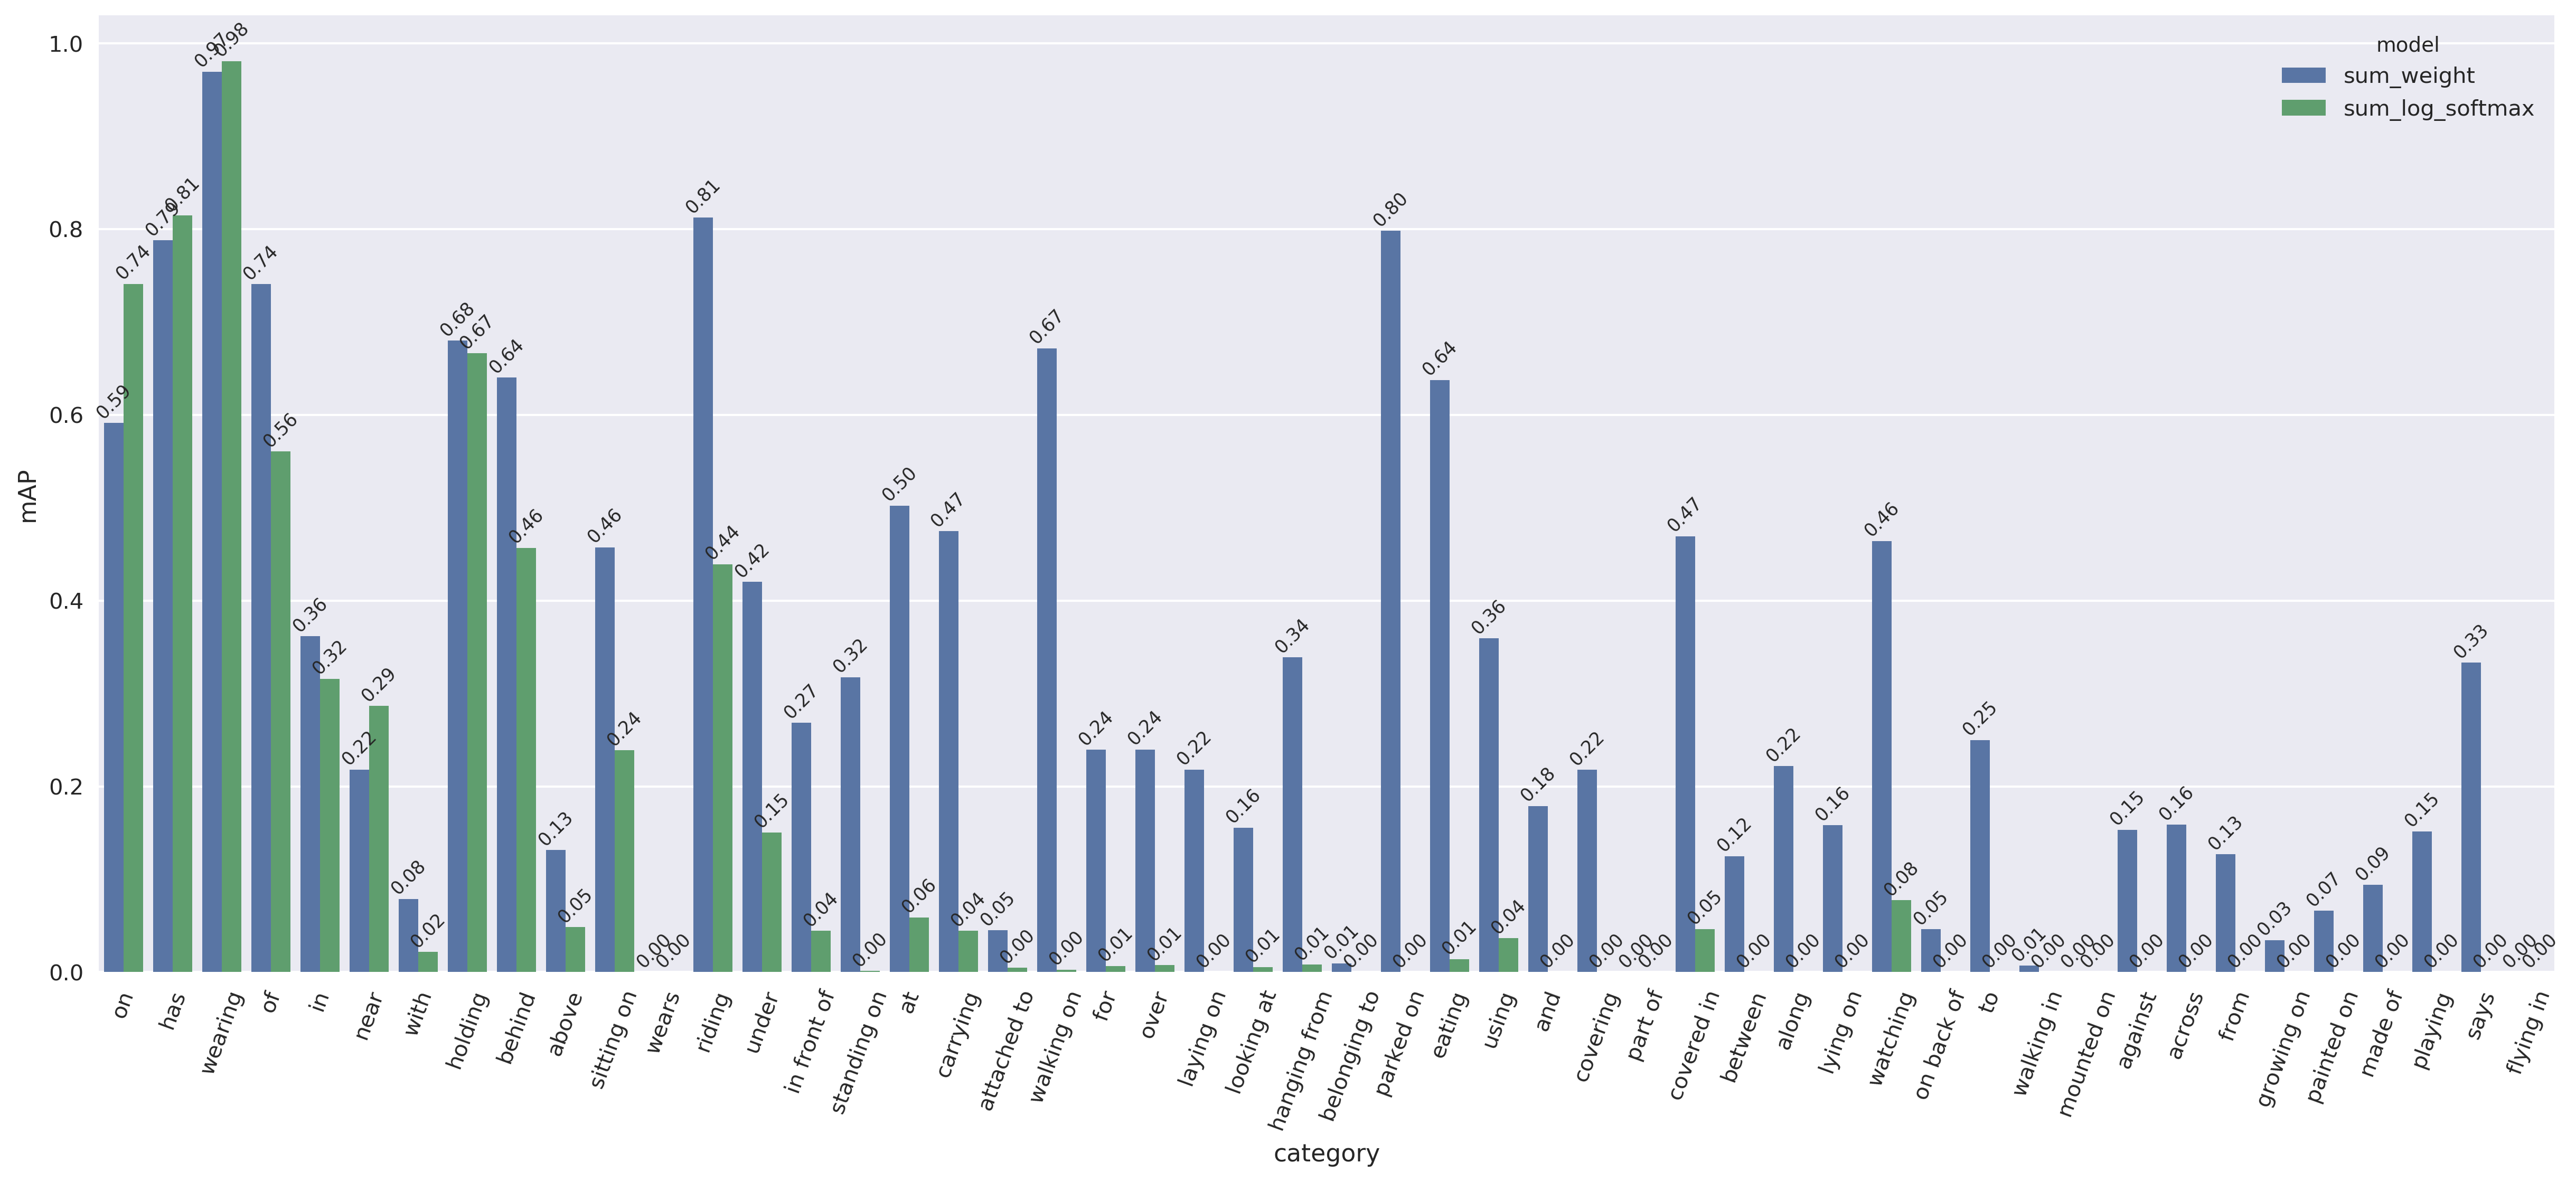

In [309]:
df, g = drawApDiff(sum_weight_mAP, sum_weightlog_softmax_mAP, top_k=20)
fig = g.get_figure()
fig.set_size_inches(20, 8)
fig.savefig('./mAP_top20.png')

In [166]:
def drawApMulti(baseline_AP, udirg_AP, dirg_AP,target_AP, VG_dicts=VG_dicts, top_k=10): 
    Ap_diff = target_AP - baseline_AP 
    
    sorted_args = np.flip(np.argsort(np.abs(Ap_diff[1:])))[:top_k] + 1
    sorted_args = np.insert(sorted_args, 0, 0)
    baseline_top_k = baseline_AP[sorted_args]
    arte_top_k = target_AP[sorted_args]
    udirg_top_k = udirg_AP[sorted_args]
    dirg_top_k = dirg_AP[sorted_args]
    
    baseline_df = createDataFrame(sorted_args, baseline_top_k, 'baseline', VG_dicts)
    udirg_df = createDataFrame(sorted_args, udirg_top_k, 'undirect', VG_dicts)
    dirg_df = createDataFrame(sorted_args, dirg_top_k, 'direct', VG_dicts)    
    arte_df = createDataFrame(sorted_args, arte_top_k, 'AOE (ours)', VG_dicts)
    
    df = baseline_df.append(udirg_df)
    df = df.append(dirg_df)
    df = df.append(arte_df)
    
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['xtick.labelsize'] = 20
    plt.rcParams['ytick.labelsize'] = 20 
    
    #fig, ax = plt.subplots(figsize=(20, 10), dpi=600)
    fig, ax = plt.subplots(figsize=(40, 10), dpi=800) #600
    plt.setp( ax.xaxis.get_majorticklabels(), rotation=70 )
    sns.set()
    g = sns.barplot(data=df, x='category', y='AP', hue='model', ax=ax)
    for p in g.patches:
        g.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 12), textcoords = 'offset points', rotation=70, fontsize='large')
    return df, g

In [ ]:
df, g = drawApMulti(baseline_AP,udirg_AP,dirg_AP,current_AP, top_k=50)
fig = g.get_figure()
fig.savefig('./mAP/mAP_top50.png')